In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import contingency_matrix

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# ASSIGNMENT 1
# Task A
# Generate 4 Gaussian Clusters with STD=0.6

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, center_box=(-10.0, 10.0), 
                  random_state=None)
# Let's create a dataframe from them
data = np.concatenate([X, y.reshape(-1,1)], axis=1)
df = pd.DataFrame(data, columns=['x1', 'x2', 'class'])
df['class'] = df['class'].astype(int) # convert class column from float to integer
df

,x1,x2,class
0,9.094728,8.293466,1
1,8.924988,9.070064,1
2,5.278787,0.460068,3
3,-1.678127,-4.703121,0
4,5.749300,0.769365,3
...,...,...,...
295,9.279563,9.641016,1
296,6.628550,7.273453,2
297,4.503439,1.057169,3
298,7.036682,9.564998,1


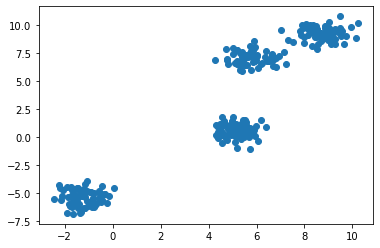

In [3]:
# Let's plot the data
plt.scatter(df['x1'], df['x2'])

In [4]:
# Task B
# Let's run the KMeans algorithm
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
# Let's create all 10 kmeans algorithm from k=1 to k=10 and append them to kmeans_10 list
kmeans_10 = []
inertias = [] # we will need this in Task C
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=None).fit(X)
    kmeans_10.append(kmeans)
    inertias.append(kmeans.inertia_) # Saves sum of squared distances to their closest centers
    print('Contingency Matrix when k='+str(k)+'\n', contingency_matrix(y, kmeans.labels_))
    print('')

Contingency Matrix when k=1
 [[75]
 [75]
 [75]
 [75]]

Contingency Matrix when k=2
 [[75  0]
 [ 0 75]
 [ 0 75]
 [75  0]]

Contingency Matrix when k=3
 [[75  0  0]
 [ 0 75  0]
 [ 0 75  0]
 [ 0  0 75]]

Contingency Matrix when k=4
 [[ 0  0 75  0]
 [ 0  0  0 75]
 [ 0 75  0  0]
 [75  0  0  0]]

Contingency Matrix when k=5
 [[ 0  0 42  0 33]
 [ 0  0  0 75  0]
 [ 0 75  0  0  0]
 [75  0  0  0  0]]

Contingency Matrix when k=6
 [[ 0  0 41  0  0 34]
 [ 0  0  0 75  0  0]
 [ 0 36  0  0 39  0]
 [75  0  0  0  0  0]]

Contingency Matrix when k=7
 [[ 0  0 43  0  0 32  0]
 [ 0  0  0 75  0  0  0]
 [ 0 37  0  0 38  0  0]
 [39  0  0  0  0  0 36]]

Contingency Matrix when k=8
 [[34  0  0  0 41  0  0  0]
 [ 0  0  0 26  0  0  0 49]
 [ 0 39  0  0  0 36  0  0]
 [ 0  0 45  0  0  0 30  0]]

Contingency Matrix when k=9
 [[ 0 38  0  0  0 37  0  0  0]
 [ 0  0  0 28  0  0 24  0 23]
 [ 0  0 42  0 33  0  0  0  0]
 [44  0  0  0  0  0  0 31  0]]

Contingency Matrix when k=10
 [[ 0  0 43  0  0  0  0  0 32  0]
 [24  0  0

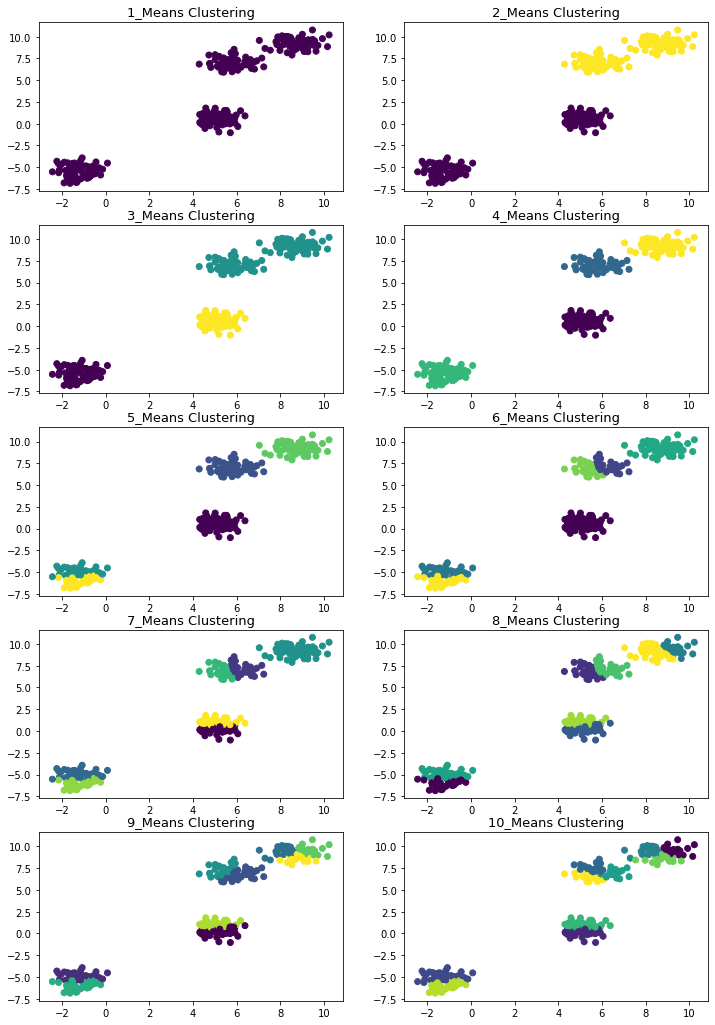

In [5]:
# Let's plot every kmeans model, plotting them on a 5 by 2 grid
n_clusters = 1
plt.figure(figsize=(12,18)) # create figure
for i in range(5): #5 rows
    for j in range(2): # 2 columns
        plt.subplot2grid((5,2), (i,j))
        plt.scatter(df['x1'], df['x2'], c=kmeans_10[n_clusters-1].labels_, 
                    cmap='viridis') # plot clusters with different colors
        plt.title(str(n_clusters)+'_Means Clustering', size=13)
        n_clusters += 1 # increment
plt.show()

Text(0.5, 1.0, 'Sum of Squared Errors')

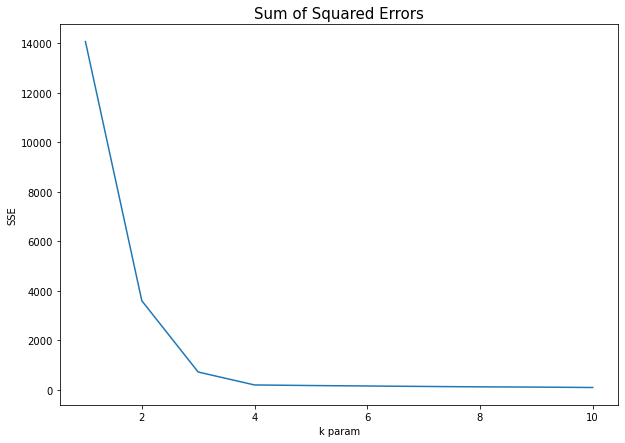

In [6]:
# Task C
# Plot Sum of Squared Errors we calculated in Task B
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,11), inertias) # called Elbow-method
plt.xlabel('k param')
plt.ylabel('SSE')
plt.title('Sum of Squared Errors', size=15)

# We can clearly see that the minimum Error is obtained at k=4 (where the curve breaks and become
# horizontal)

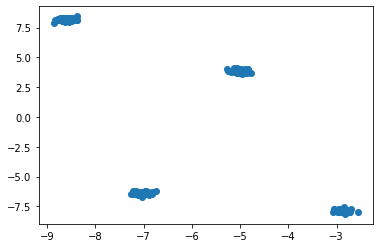

In [7]:
# Task D

# Generate 4 Gaussian Clusters with STD=0.1

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.1, center_box=(-10.0, 10.0), 
                  random_state=None)
# Let's create a dataframe
data = np.concatenate([X, y.reshape(-1,1)], axis=1)
df = pd.DataFrame(data, columns=['x1', 'x2', 'class'])
df['class'] = df['class'].astype(int) # convert class column from float to integer
# Let's plot the data
plt.scatter(df['x1'], df['x2'])

In [8]:
# Let's run the KMeans algorithm
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
# Let's create all 10 kmeans algorithm from k=1 to k=10 and append them to kmeans_10 list
kmeans_10 = []
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=None).fit(X)
    kmeans_10.append(kmeans)
    inertias.append(kmeans.inertia_) # Saves sum of squared distances to their closest centers
    print('Contingency Matrix when k='+str(k)+'\n', contingency_matrix(y, kmeans.labels_))
    print('')

Contingency Matrix when k=1
 [[75]
 [75]
 [75]
 [75]]

Contingency Matrix when k=2
 [[ 0 75]
 [ 0 75]
 [75  0]
 [75  0]]

Contingency Matrix when k=3
 [[ 0  0 75]
 [75  0  0]
 [ 0 75  0]
 [ 0 75  0]]

Contingency Matrix when k=4
 [[ 0 75  0  0]
 [ 0  0 75  0]
 [75  0  0  0]
 [ 0  0  0 75]]

Contingency Matrix when k=5
 [[38  0  0  0 37]
 [ 0  0 75  0  0]
 [ 0  0  0 75  0]
 [ 0 75  0  0  0]]

Contingency Matrix when k=6
 [[38  0  0  0  0 37]
 [ 0  0 44  0 31  0]
 [ 0 75  0  0  0  0]
 [ 0  0  0 75  0  0]]

Contingency Matrix when k=7
 [[ 0  0 39  0 36  0  0]
 [ 0 35  0  0  0  0 40]
 [48  0  0  0  0 27  0]
 [ 0  0  0 75  0  0  0]]

Contingency Matrix when k=8
 [[ 0  0 37  0  0 38  0  0]
 [35  0  0  0 40  0  0  0]
 [ 0 31  0  0  0  0 44  0]
 [ 0  0  0 43  0  0  0 32]]

Contingency Matrix when k=9
 [[ 0  0 38  0  0  0 37  0  0]
 [34  0  0  0 41  0  0  0  0]
 [ 0 23  0  0  0 21  0 31  0]
 [ 0  0  0 39  0  0  0  0 36]]

Contingency Matrix when k=10
 [[28  0  0  0  0 26 21  0  0  0]
 [ 0  0 43

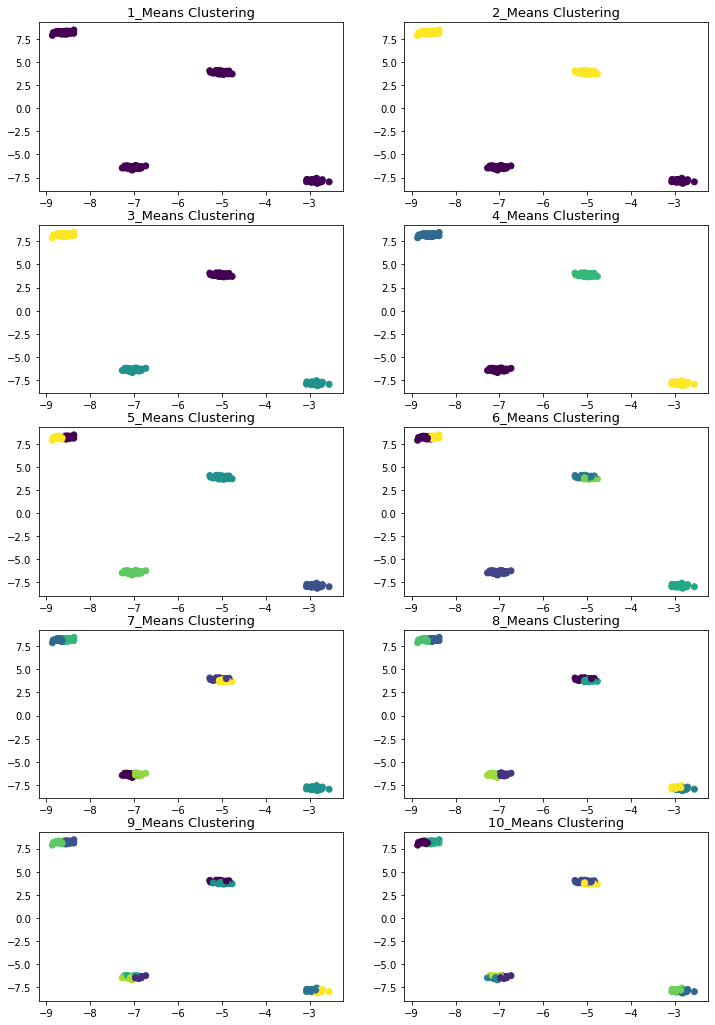

In [9]:
# Let's plot every kmeans model, plotting them on a 5 by 2 grid
n_clusters = 1
plt.figure(figsize=(12,18))
for i in range(5): # 5 rows
    for j in range(2): # 2 columns
        plt.subplot2grid((5,2), (i,j))
        plt.scatter(df['x1'], df['x2'], c=kmeans_10[n_clusters-1].labels_, 
                    cmap='viridis') # plot clusters with different colors
        plt.title(str(n_clusters)+'_Means Clustering', size=13)
        n_clusters += 1 # increment
plt.show()

Text(0.5, 1.0, 'Sum of Squared Errors')

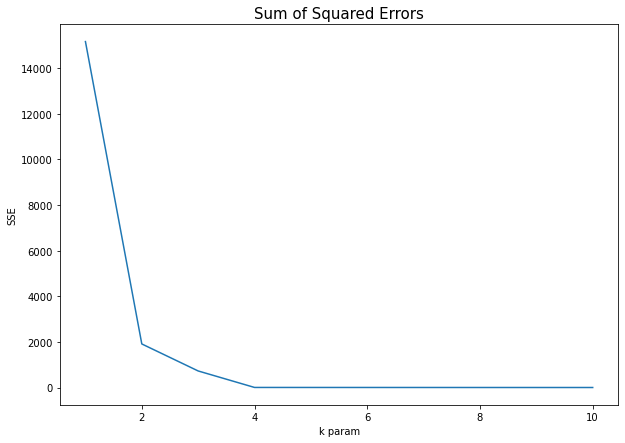

In [10]:
# Plot Sum of Squared Errors we calculated in Task b
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,11), inertias) # called Elbow-method
plt.xlabel('k param')
plt.ylabel('SSE')
plt.title('Sum of Squared Errors', size=15)

# We can clearly see that the minimum Error is obtained at k=4 again

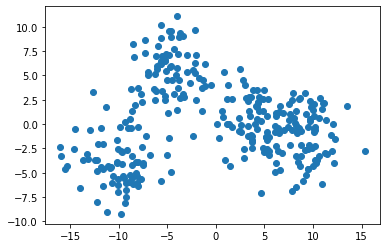

In [11]:
# Now generate 4 Gaussian Clusters when STD=2.5

X, y = make_blobs(n_samples=300, centers=4, cluster_std=2.5, center_box=(-10.0, 10.0), 
                  random_state=None)
# Let's create a dataframe
data = np.concatenate([X, y.reshape(-1,1)], axis=1)
df = pd.DataFrame(data, columns=['x1', 'x2', 'class'])
df['class'] = df['class'].astype(int) # convert class column from float to integer
# Let's plot the data
plt.scatter(df['x1'], df['x2'])

In [12]:
# Let's run the KMeans algorithm
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
# Let's create all 10 kmeans algorithm from k=1 to k=10 and append them to kmeans_10 list
kmeans_10 = []
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=None).fit(X)
    kmeans_10.append(kmeans)
    inertias.append(kmeans.inertia_) # Saves sum of squared distances to their closest centers
    print('Contingency Matrix when k='+str(k)+'\n', contingency_matrix(y, kmeans.labels_))
    print('')

Contingency Matrix when k=1
 [[75]
 [75]
 [75]
 [75]]

Contingency Matrix when k=2
 [[75  0]
 [ 0 75]
 [ 1 74]
 [73  2]]

Contingency Matrix when k=3
 [[ 0 75  0]
 [ 0  0 75]
 [ 4  0 71]
 [74  1  0]]

Contingency Matrix when k=4
 [[ 0 75  0  0]
 [70  0  5  0]
 [ 8  0 65  2]
 [ 0  1  3 71]]

Contingency Matrix when k=5
 [[ 0  0 75  0  0]
 [ 3  0  0 33 39]
 [60  1  0  5  9]
 [ 3 71  1  0  0]]

Contingency Matrix when k=6
 [[ 0 64  0  0 11  0]
 [ 0  0  4 38  0 33]
 [ 1  0 62  7  0  5]
 [58  0  2  0 15  0]]

Contingency Matrix when k=7
 [[ 0 10  0  0 20 45  0]
 [33  0  0 39  0  0  3]
 [ 5  0  1  9  0  0 60]
 [ 0 15 58  0  0  0  2]]

Contingency Matrix when k=8
 [[ 0 45  0  0 10  0 20  0]
 [29  0  0  0  0  9  0 37]
 [ 1  0  0 39  0 27  0  8]
 [ 0  0 55  3 17  0  0  0]]

Contingency Matrix when k=9
 [[ 0 19  0  0  0 45  0  0 11]
 [ 0  0  0 30  0  0 37  8  0]
 [34  0  0  1  1  0  8 31  0]
 [ 2  0 37  0 29  0  0  0  7]]

Contingency Matrix when k=10
 [[ 0  0 45  0  0 10  0  0  0 20]
 [ 0 35  0

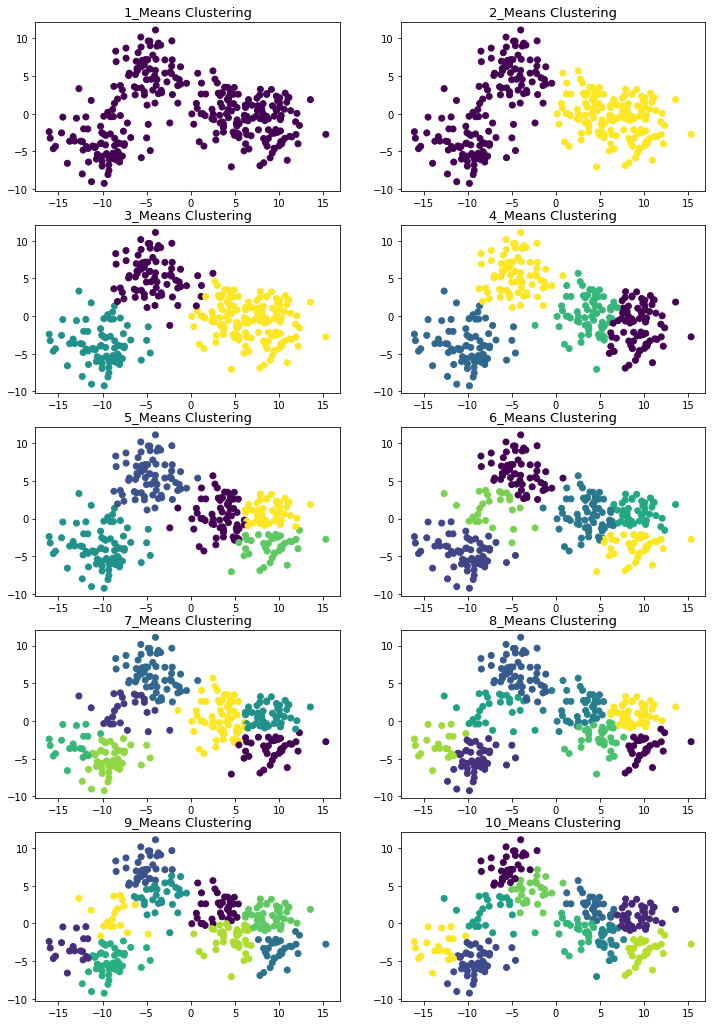

In [13]:
# Let's plot every kmeans model, plotting them on a 5 by 2 grid
n_clusters = 1
plt.figure(figsize=(12,18))
for i in range(5): # 5 rows
    for j in range(2): #2 columns
        plt.subplot2grid((5,2), (i,j))
        plt.scatter(df['x1'], df['x2'], c=kmeans_10[n_clusters-1].labels_, 
                    cmap='viridis')# plot clusters with different colors
        plt.title(str(n_clusters)+'_Means Clustering', size=13)
        n_clusters += 1 # increment
plt.show()

Text(0.5, 1.0, 'Sum of Squared Errors')

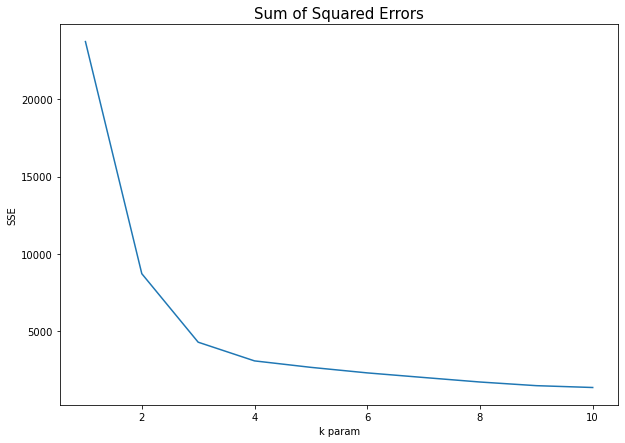

In [14]:
# Plot Sum of Squared Errors we calculated in Task b
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,11), inertias) # called Elbow-method
plt.xlabel('k param')
plt.ylabel('SSE')
plt.title('Sum of Squared Errors', size=15)

# Now the SSE plot does not clearly indicates that we have 4 different clusters in our 
# dataset, the curve smoothly asymptote to x label (there is no sharp break)

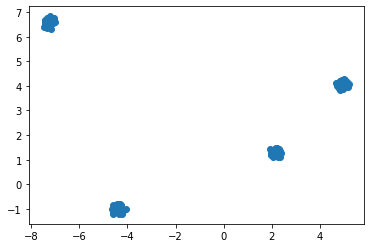

In [15]:
# Task E
# Let's repeat Task D
# Generate 4 Gaussian Clusters with STD=0.1

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.1, center_box=(-10.0, 10.0), 
                  random_state=None)
# Let's create a dataframe
data = np.concatenate([X, y.reshape(-1,1)], axis=1)
df = pd.DataFrame(data, columns=['x1', 'x2', 'class'])
df['class'] = df['class'].astype(int) # convert class column from float to integer
# Let's plot the data
plt.scatter(df['x1'], df['x2'])

In [16]:
# Let's run the KMeans algorithm
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
# Let's create all 10 kmeans algorithm from k=1 to k=10 and append them to kmeans_10 list
kmeans_10 = []
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=101).fit(X) # here we specify random_state to integer
    kmeans_10.append(kmeans)
    inertias.append(kmeans.inertia_) # Saves sum of squared distances to their closest centers
    print('Contingency Matrix when k='+str(k)+'\n', contingency_matrix(y, kmeans.labels_))
    print('')

Contingency Matrix when k=1
 [[75]
 [75]
 [75]
 [75]]

Contingency Matrix when k=2
 [[ 0 75]
 [ 0 75]
 [75  0]
 [75  0]]

Contingency Matrix when k=3
 [[ 0  0 75]
 [ 0 75  0]
 [75  0  0]
 [75  0  0]]

Contingency Matrix when k=4
 [[ 0  0 75  0]
 [ 0 75  0  0]
 [ 0  0  0 75]
 [75  0  0  0]]

Contingency Matrix when k=5
 [[75  0  0  0  0]
 [ 0  0 75  0  0]
 [ 0 28  0  0 47]
 [ 0  0  0 75  0]]

Contingency Matrix when k=6
 [[ 0  0 32  0 43  0]
 [75  0  0  0  0  0]
 [ 0 28  0  0  0 47]
 [ 0  0  0 75  0  0]]

Contingency Matrix when k=7
 [[ 0  0 75  0  0  0  0]
 [ 0 39  0  0  0 36  0]
 [ 0  0  0 48  0  0 27]
 [24  0  0  0 51  0  0]]

Contingency Matrix when k=8
 [[ 0  0 34  0  0  0 41  0]
 [ 0 44  0  0  0  0  0 31]
 [47  0  0  0 28  0  0  0]
 [ 0  0  0 43  0 32  0  0]]

Contingency Matrix when k=9
 [[ 0  0 33  0  0 28 14  0  0]
 [ 0 36  0  0  0  0  0  0 39]
 [ 0  0  0 47  0  0  0 28  0]
 [43  0  0  0 32  0  0  0  0]]

Contingency Matrix when k=10
 [[ 0  0 33  0 28  0  0  0 14  0]
 [ 0 39  0

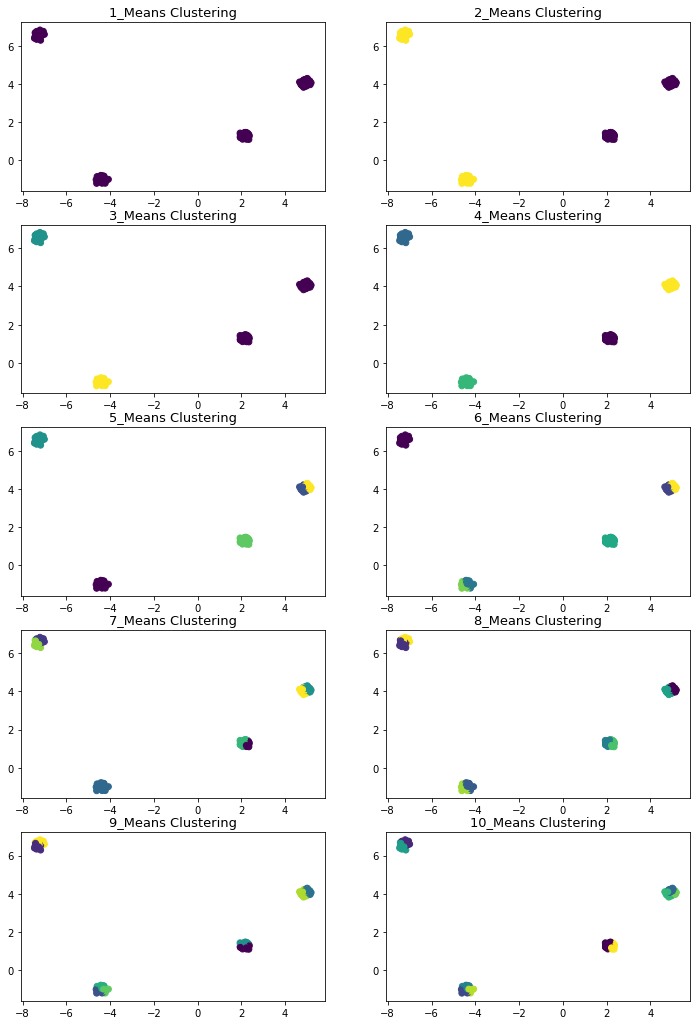

In [17]:
# Let's plot every kmeans model, plotting them on a 5 by 2 grid
n_clusters = 1
plt.figure(figsize=(12,18))
for i in range(5): # 5 rows
    for j in range(2): # 2 columns
        plt.subplot2grid((5,2), (i,j))
        plt.scatter(df['x1'], df['x2'], c=kmeans_10[n_clusters-1].labels_, 
                    cmap='viridis')# plot clusters with different colors
        plt.title(str(n_clusters)+'_Means Clustering', size=13)
        n_clusters += 1 # increment
plt.show()

Text(0.5, 1.0, 'Sum of Squared Errors')

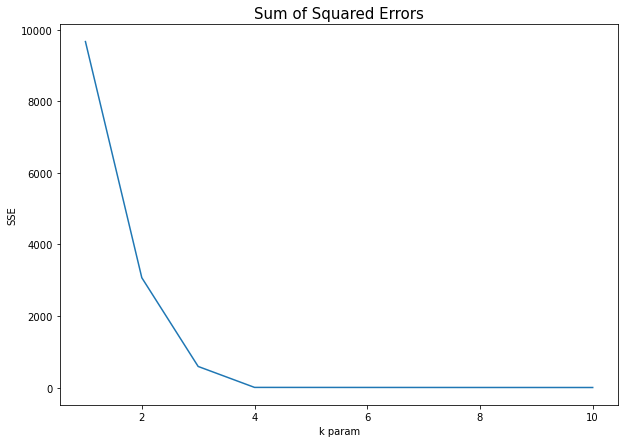

In [18]:
# Plot Sum of Squared Errors
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,11), inertias) # called Elbow-method
plt.xlabel('k param')
plt.ylabel('SSE')
plt.title('Sum of Squared Errors', size=15)

# We receive similar clustering solution with random_state=integer when random_state was None, 
# therefore random_state param does not have significant affect on the clustering modeling 
# when STD=0.1 (clusters does not merge into each other)

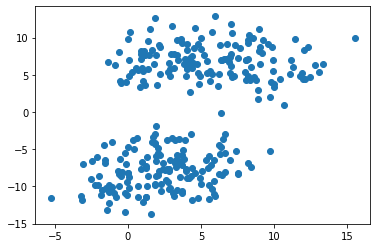

In [19]:
# Let's repeat Task D
# Generate 4 Gaussian Clusters with STD=2.5

X, y = make_blobs(n_samples=300, centers=4, cluster_std=2.5, center_box=(-10.0, 10.0), 
                  random_state=None)
# Let's create a dataframe
data = np.concatenate([X, y.reshape(-1,1)], axis=1)
df = pd.DataFrame(data, columns=['x1', 'x2', 'class'])
df['class'] = df['class'].astype(int) # convert class column from float to integer
# Let's plot the data
plt.scatter(df['x1'], df['x2'])

In [20]:
# Let's run the KMeans algorithm
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
# Let's create all 10 kmeans algorithm from k=1 to k=10 and append them to kmeans_10 list
kmeans_10 = []
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=101).fit(X)# here we specify random_state to integer
    kmeans_10.append(kmeans)
    inertias.append(kmeans.inertia_) # Saves sum of squared distances to their closest centers
    print('Contingency Matrix when k='+str(k)+'\n', contingency_matrix(y, kmeans.labels_))
    print('')

Contingency Matrix when k=1
 [[75]
 [75]
 [75]
 [75]]

Contingency Matrix when k=2
 [[75  0]
 [ 0 75]
 [75  0]
 [ 0 75]]

Contingency Matrix when k=3
 [[75  0  0]
 [ 0  8 67]
 [75  0  0]
 [ 0 64 11]]

Contingency Matrix when k=4
 [[18  0  0 57]
 [ 0 67  8  0]
 [61  0  0 14]
 [ 1 11 63  0]]

Contingency Matrix when k=5
 [[18  0 10  0 47]
 [ 0 67  0  8  0]
 [37  0 33  0  5]
 [ 0 13  1 61  0]]

Contingency Matrix when k=6
 [[10  0 47  0  0 18]
 [ 0 59  0  3 13  0]
 [33  0  5  0  0 37]
 [ 1 12  0 34 28  0]]

Contingency Matrix when k=7
 [[13  0 15  0  0  0 47]
 [ 0 16  0 36 21  2  0]
 [35  0 34  0  0  0  6]
 [ 0 26  0  3 15 31  0]]

Contingency Matrix when k=8
 [[ 0 19  0  1 40 15  0  0]
 [ 7  0 56  0  0  0  0 12]
 [ 0 26  0 20  2 27  0  0]
 [24  0  7  0  0  0 18 26]]

Contingency Matrix when k=9
 [[ 0 41  0  1  0  0  0 15 18]
 [24  0  5  0 20  2 24  0  0]
 [ 0  2  0 20  0  0  0 27 26]
 [ 1  0 23  0 19 29  3  0  0]]

Contingency Matrix when k=10
 [[ 0 19  0  0  0 40  1 15  0  0]
 [21  0  7

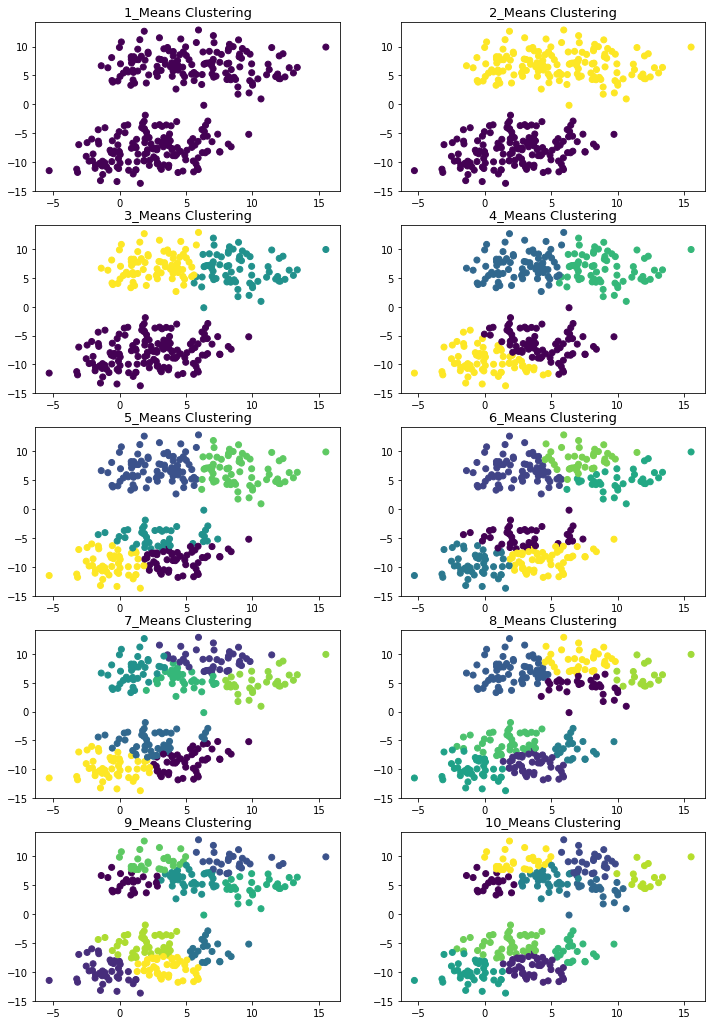

In [21]:
# Let's plot every kmeans model, plotting them on a 5 by 2 grid
n_clusters = 1
plt.figure(figsize=(12,18))
for i in range(5): # 5 rows
    for j in range(2): # 2 columns
        plt.subplot2grid((5,2), (i,j))
        plt.scatter(df['x1'], df['x2'], c=kmeans_10[n_clusters-1].labels_, 
                    cmap='viridis') # plot clusters with different colors
        plt.title(str(n_clusters)+'_Means Clustering', size=13)
        n_clusters += 1 # increment
plt.show()

Text(0.5, 1.0, 'Sum of Squared Errors')

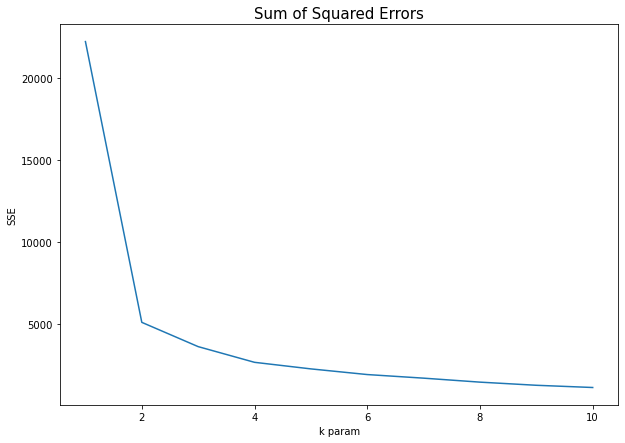

In [22]:
# Plot Sum of Squared Errors
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,11), inertias) # called Elbow-method
plt.xlabel('k param')
plt.ylabel('SSE')
plt.title('Sum of Squared Errors', size=15)

In [23]:
# Conclusions:
# Here the clustering algorithm slighly differs from(groups elements into different cluster every time
# we specify another random_state value) when we set random_state to None
# The SSE plot looks very similar but we can clearly see the differences on our scatter plots (i.e.
# color boundaries change by changing random_state)
# The reason we got this is because the clusters merge into each other which makes the algorithm
# harder to cluster them and indentify the groups
# By finding the right random_state param we can propose an extension of the k-means initialization 
# that results in a clustering solution similar to that obtained for random_state=None

In [24]:
# ASSIGNMENT 2
# Task A
vertebrate = pd.read_csv('Project_VK/vertebrate.csv') # read in the file
print(vertebrate['Class'].value_counts())
vertebrate
# There are 5 kind of classes

mammals       5
reptiles      3
fishes        3
amphibians    2
birds         2
Name: Class, dtype: int64


,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


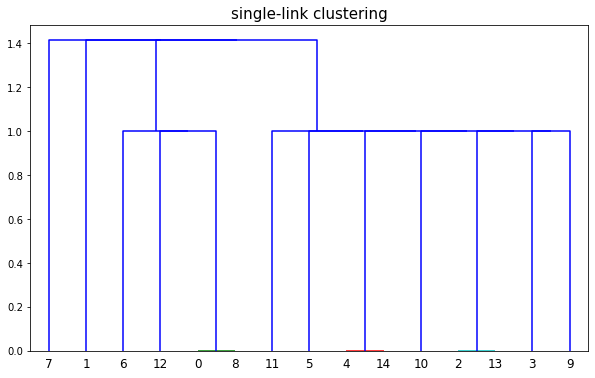

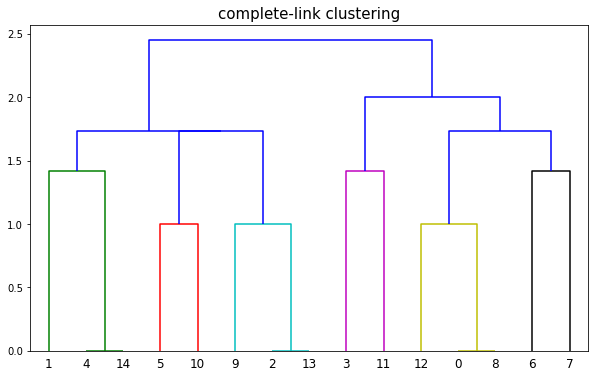

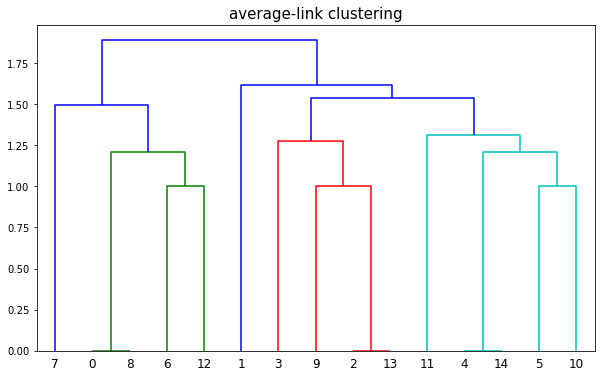

In [25]:
# Task B
X = vertebrate.iloc[:,1:7].values
# Loop over all three methods (complete is actually max-link clustering)
labelList = range(len(X))
for link in ['single', 'complete', 'average']:
    linked = linkage(X, link)
    plt.figure(figsize=(10, 6))
    dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending',
               show_leaf_counts=True) # this line plots the dendogram
    plt.title(str(link)+'-link clustering', size=15)

plt.show()
# The single-link clustering performs pretty badly (clustered them into 4 clusters only)
# The complete-link clustering is much better but creates one more cluster than we actually have
# The average-link clustering model performs similarly than complete (max) but clusters data into 
# only 4 groups
# In overall, the the max-link has the best clustering solution (11 clustered well out of 16 
# animals)

In [26]:
# ASSIGNMENT 3
# Task A
chameleon = pd.read_csv('Project_VK/chameleon.csv') # read in the file
chameleon

,x,y
0,650.914,214.888
1,41.767,179.408
2,509.126,233.749
3,486.403,152.427
4,46.883,367.904
...,...,...
1966,631.430,210.478
1967,187.652,247.923
1968,124.996,264.847
1969,522.511,302.785


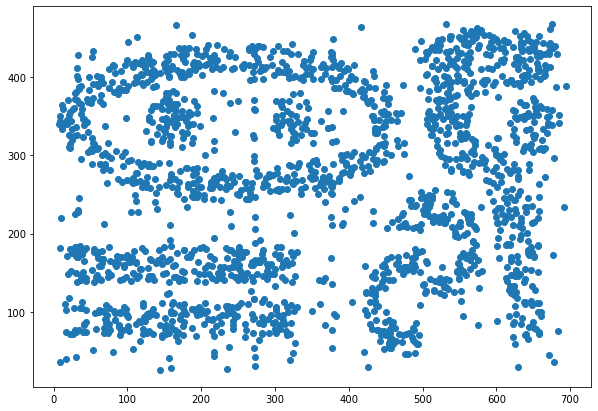

In [27]:
# Let's visualize it
plt.figure(figsize=(10,7))
plt.scatter(chameleon['x'], chameleon['y'])

# We have around 8 clusters so we expect our model to cluster data into 8 distinct clusters

In [28]:
# Task B
X = chameleon.values

scaler = StandardScaler()
X = scaler.fit_transform(X) # scale the features

db = DBSCAN(eps=15.5, min_samples=5).fit(X) # fit on the DBSCAN model

In [29]:
n_clusters = len(set(db.labels_))
n_clusters
# we got very bad results every record was classified into one cluster

1

In [30]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
# Task C

X = chameleon.values
scaler = StandardScaler()
X = scaler.fit_transform(X) # scale feature columns

n_clusters_list = []
epses = np.arange(0.1, 20, 0.5)
min_samples = np.arange(1, 20, 2)
# Let's loop over all parameters (eps and min_sample) and find the best params
for eps in epses:
    for min_sample in min_samples:
        db = DBSCAN(eps=eps, min_samples=min_sample).fit(X) # fit on the model
        n_clusters_list.append(len(set(db.labels_))) # save the number of diffrent clusters
print('Number of clusters\n', n_clusters_list)

# It seems when eps=0.1 and min_samples=5 we got 8 different clusters which is pretty accurate 
# according to our assumption

Number of clusters
 [80, 15, 8, 14, 25, 45, 35, 24, 18, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
# Rerun with the best parameters
db = DBSCAN(eps=0.1, min_samples=5).fit(X)
db.labels_

array([0, 1, 2, ..., 3, 0, 3], dtype=int64)

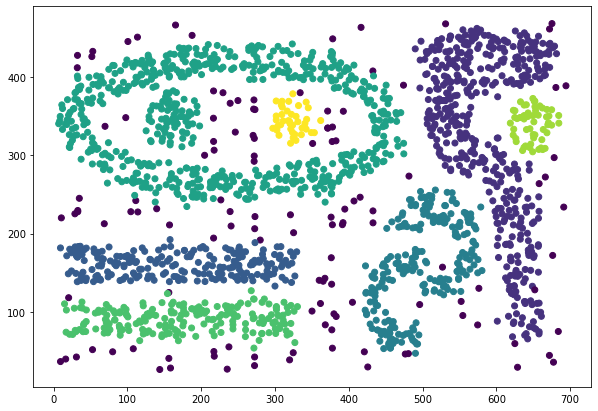

In [36]:
# Plot the model with the best params 
plt.figure(figsize=(10,7))
plt.scatter(chameleon['x'], chameleon['y'], c=db.labels_, cmap='viridis')

# The model classifies noise into an individual cluster and one cluster (left in the middle of
# the large ellipse) was wrongly classified into another group, although we have 8 clusters except 
# noise

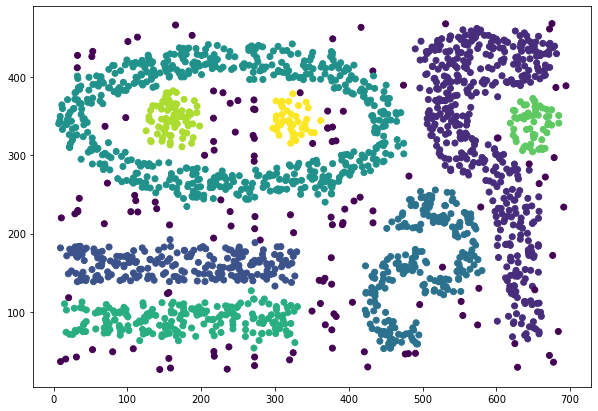

In [37]:
# I was playing around with the eps param and eps=0.098 gives a slightly better result
# Now this model separates every cluster correctly
db = DBSCAN(eps=0.098, min_samples=5, algorithm='auto').fit(X)
plt.figure(figsize=(10,7))
plt.scatter(chameleon['x'], chameleon['y'], c=db.labels_, cmap='viridis')